### ChatGPT Statistics of Distance Score

In [1]:
import os

os.chdir("..")
print(os.path.abspath(os.curdir))

/home/admin-user/swardi/drone-definition


In [4]:
def get_model_statistic(connection, model_id):
    cursor = connection.cursor()
    get_query = '''SELECT * FROM statistics WHERE model_id = {}'''.format(
        model_id)
    cursor.execute(get_query)
    statistic = cursor.fetchall()

    return statistic

def get_model_definition(connection, model_id):
    cursor = connection.cursor()
    get_query = '''SELECT * FROM definitions WHERE model_id = {}'''.format(
        model_id)
    cursor.execute(get_query)
    definitions = cursor.fetchall()

    return definitions

In [5]:
import sqlite3
import pandas as pd

def build_def_df(model_id):
    db_path = 'database/drone_definitions.db'
    connection = sqlite3.connect(db_path)
    definition = get_model_definition(connection, model_id)
    df = pd.DataFrame(definition, columns=[
                      'id', 'definition', 'term_id', 'term', 'model_id', 'model_name', 'prompt_id', 'prompt', 'counter', 'cosine_distance', 'euclidean_distance', 'manhattan_distance', 'sum_distance'])
    
    return df

In [8]:
# Get all the distance score from DB

chatgpt_definitions = build_def_df(1)
chatgpt_definitions = chatgpt_definitions.iloc[:, -4:]
chatgpt_definitions.describe()

,cosine_distance,euclidean_distance,manhattan_distance,sum_distance
count,252.000000,252.000000,252.000000,252.000000
mean,0.050805,0.316464,6.964975,7.332244
std,0.012902,0.038285,0.858402,0.909357
min,0.025904,0.227616,4.968898,5.222417
25%,0.042414,0.291251,6.391538,6.726112
50%,0.049009,0.313079,6.868279,7.226427
75%,0.057210,0.338260,7.469006,7.866665
max,0.127251,0.504483,11.095497,11.727231


In [13]:
correlation = chatgpt_definitions.corr()
correlation

,cosine_distance,euclidean_distance,manhattan_distance,sum_distance
cosine_distance,1.000000,0.993648,0.990062,0.990606
euclidean_distance,0.993648,1.000000,0.997042,0.997372
manhattan_distance,0.990062,0.997042,1.000000,0.999989
sum_distance,0.990606,0.997372,0.999989,1.000000


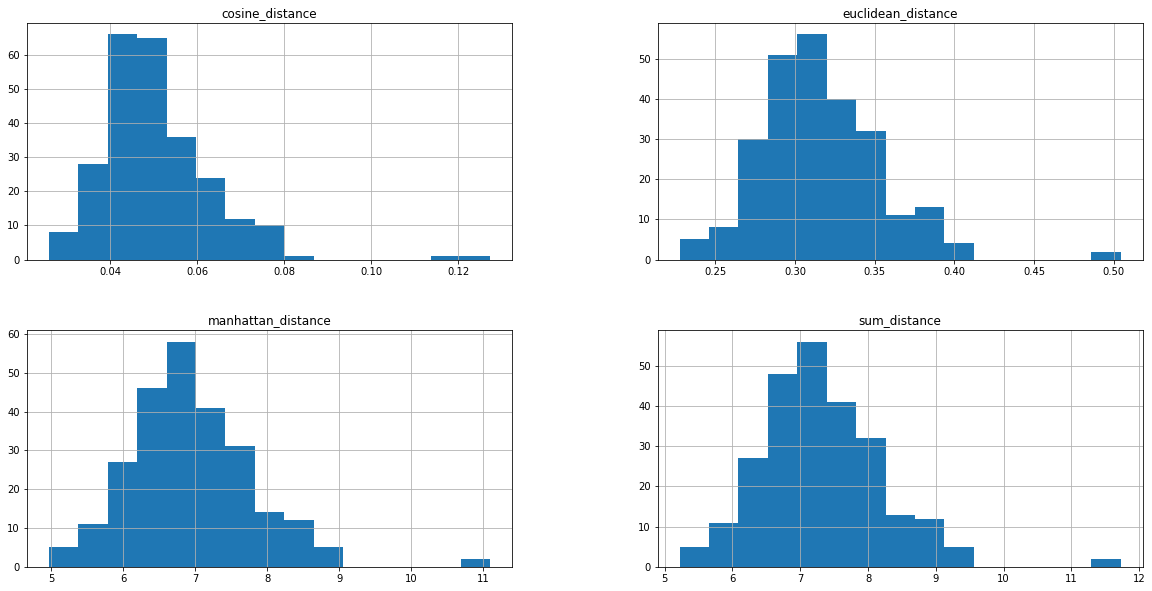

In [18]:
hist = chatgpt_definitions.hist(figsize=(20, 10), bins=15, column=['cosine_distance', 'euclidean_distance', 'manhattan_distance', 'sum_distance'])

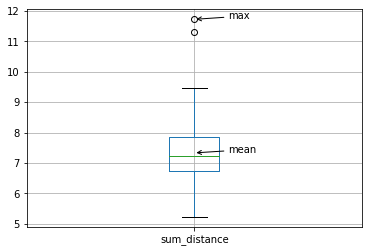

In [12]:
import matplotlib.pyplot as plt

# Create the boxplot
boxplot  = chatgpt_definitions.boxplot(column='sum_distance')

# Add annotation to the boxplot
max_value = chatgpt_definitions['sum_distance'].max()
mean_value = chatgpt_definitions['sum_distance'].mean()
boxplot.annotate("max", xy=(1, max_value), xytext=(1.1, max_value), arrowprops=dict(arrowstyle='->'))
boxplot.annotate("mean", xy=(1, mean_value), xytext=(1.1, mean_value), arrowprops=dict(arrowstyle='->'))


# Show the boxplot
plt.show()

## Mean of Sum Distance Comparison

In [13]:
import sqlite3
import pandas as pd


def get_definition(connection):
    cursor = connection.cursor()
    get_query = '''SELECT model_name, sum_distance
    FROM definitions WHERE model_id IN (1,2,3,7,8)'''
    cursor.execute(get_query)
    definitions = cursor.fetchall()

    return definitions

In [14]:

db_path = '../database/drone_definitions.db'
connection = sqlite3.connect(db_path)
definition = get_definition(connection)
definition_df = pd.DataFrame(definition, columns=['model_name', 'sum_distance'])

In [19]:
definition_df['model_name'] = definition_df['model_name'].replace({'chatgpt': 'davinci-002', 'gptturbo': 'gpt3.5'})

In [20]:
import matplotlib.pyplot as plt
# Calculate the mean of sum_distance for each model_id
mean_distance = definition_df.groupby('model_name')['sum_distance'].mean()
mean_distance

model_name
chatsonic      7.475804
claude         7.874340
davinci-002    7.332244
gpt3.5         7.050695
gpt4           7.002949
Name: sum_distance, dtype: float64

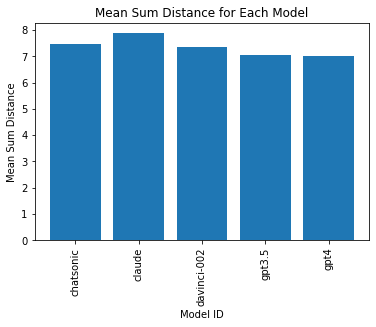

In [21]:

# Create a bar graph
plt.bar(mean_distance.index, mean_distance.values)
plt.xlabel('Model ID')
plt.ylabel('Mean Sum Distance')
plt.title('Mean Sum Distance for Each Model')
plt.xticks(rotation=90)
plt.show()

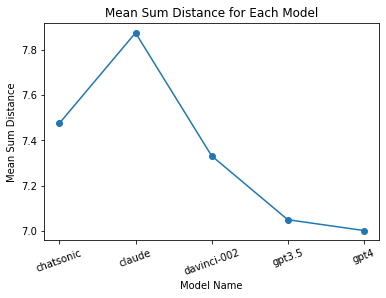

In [28]:
# Create a line plot
plt.plot(mean_distance.index, mean_distance.values, marker='o')
plt.xlabel('Model Name')
plt.ylabel('Mean Sum Distance')
plt.title('Mean of Sum Distance')
plt.xticks(rotation=20)
plt.savefig('../analysis/visualization/mean_distance_all.pdf')
plt.show()

                  min        max      mean       std
model_name                                          
chatsonic    5.774353   9.782767  7.475804  0.721922
claude       5.661503  11.248888  7.874340  0.823543
davinci-002  5.222417  11.727231  7.332244  0.909357
gpt3.5       5.237752   9.880052  7.050695  0.752273
gpt4         5.398617   9.181116  7.002949  0.700471


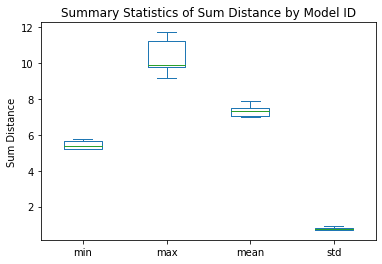

In [30]:
summary_stats = definition_df.groupby('model_name')['sum_distance'].agg(['min', 'max', 'mean', 'std'])

# Print the summary statistics
print(summary_stats)

# Plot the box plot
summary_stats.plot(kind='box')
plt.ylabel('Sum Distance')
plt.title('Summary Statistics of Sum Distance by Model ID')
plt.show()

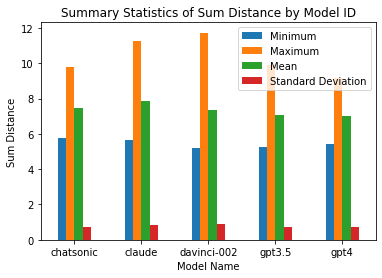

In [31]:
# Assuming your DataFrame is named 'df' with columns 'model_id' and 'sum_distance'

# Group by 'model_id' and calculate the desired summary statistics
summary_stats = definition_df.groupby('model_name')['sum_distance'].agg(['min', 'max', 'mean', 'std'])

# Reset the index to make 'model_id' a regular column
summary_stats = summary_stats.reset_index()

# Plot the bar graph
summary_stats.plot(x='model_name', y=['min', 'max', 'mean', 'std'], kind='bar', rot=0)
plt.xlabel('Model Name')
plt.ylabel('Sum Distance')
plt.title('Summary Statistics of Sum Distance by Model ID')
plt.legend(['Minimum', 'Maximum', 'Mean', 'Standard Deviation'])
plt.show()

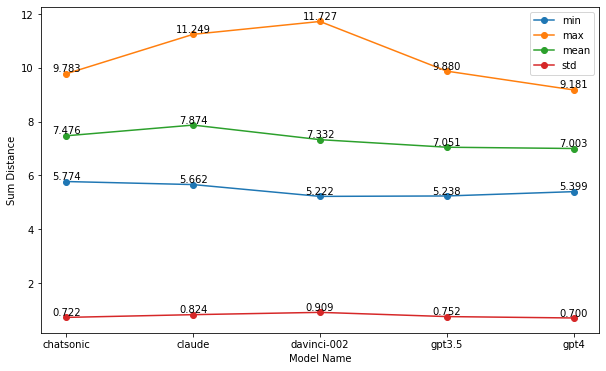

In [35]:
# Group by 'model_id' and calculate the desired summary statistics
summary_stats = definition_df.groupby('model_name')['sum_distance'].agg(['min', 'max', 'mean', 'std'])

# Reset the index to make 'model_id' a regular column
summary_stats = summary_stats.reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line graph
x = summary_stats['model_name']
columns = ['min', 'max', 'mean', 'std']
for col in columns:
    plt.plot(x, summary_stats[col], marker='o', label=col)
    for i, j in zip(x, summary_stats[col]):
        plt.text(i, j, f'{j:.3f}', ha='center', va='bottom')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Model Name')
plt.ylabel('Sum Distance')
# plt.title('Summary Statistics of Sum Distance')

# Show the legend
plt.legend()
plt.savefig('../analysis/visualization/sum_distance_statistics_all.pdf')
# Show the plot
plt.show()

## Counter for each model with the minimum sum_distance

In [38]:
import sqlite3
import pandas as pd


def min_max_counter(connection, metric='min'):
    # cursor = connection.cursor()
    get_query = '''SELECT model_name, COUNT(*) AS best_definition_count
    FROM (
        SELECT term_id, {}(sum_distance) AS {}_distance
        FROM definitions
        GROUP BY term_id
    ) AS best_definitions
    JOIN definitions ON definitions.term_id = best_definitions.term_id AND definitions.sum_distance = best_definitions.{}_distance
    GROUP BY model_name
    ORDER BY best_definition_count DESC'''.format(metric, metric, metric)
    df = pd.read_sql_query(get_query, connection)
    # cursor.execute(get_query)
    # definitions = cursor.fetchall()

    return df

In [39]:
db_path = '../database/drone_definitions.db'
connection = sqlite3.connect(db_path)
min_defintion = min_max_counter(connection, 'min')
# min_defintion = pd.DataFrame(definition, columns=['model_name', 'best_definition_count'])

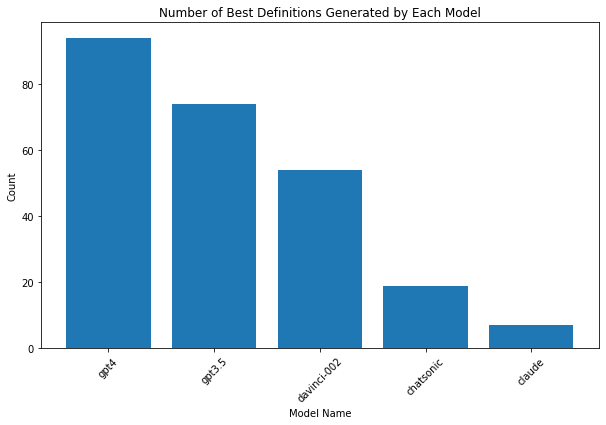

In [41]:
min_defintion['model_name'] = min_defintion['model_name'].replace({'chatgpt': 'davinci-002', 'gptturbo': 'gpt3.5'})
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(min_defintion['model_name'], min_defintion['best_definition_count'])
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.title('Number of Best Definitions Generated by Each Model')
plt.xticks(rotation=45)
plt.show()

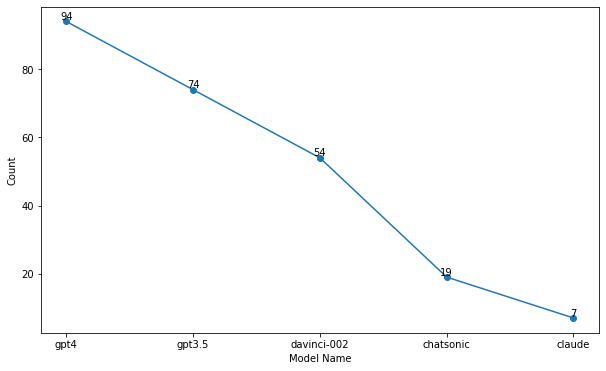

In [44]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(min_defintion['model_name'], min_defintion['best_definition_count'], marker='o')
plt.xlabel('Model Name')
plt.ylabel('Count')
# plt.title('Number of Best Definitions Generated by Each Model')
plt.xticks()

# Add value labels to each data point
for i, j in zip(min_defintion['model_name'], min_defintion['best_definition_count']):
    plt.text(i, j, str(j), ha='center', va='bottom')

plt.show()